In [140]:
from scipy import signal
def lowpass_filt(t,noisy_signal):
    fs = 100 # Sampling frequency

    fc = 10 # Cut-off frequency of the filter
    w = fc / (fs / 2) # Normalize the frequency
    b, a = signal.butter(3, w, 'low')
    y = signal.filtfilt(b, a, noisy_signal)
 
    
    plt.figure
    #plt.ylim(170,180)
    #plt.xlim(1500,2000)
    plt.ylabel('Volt(1/1024V)')
    plt.xlabel('Time(s)')

    plt.plot(t, noisy_signal,'lightseagreen')
    plt.plot(t,y, 'palevioletred',alpha=0.8)
    plt.legend(('noisy signal', 'Filterd'), loc='best')
    plt.show()
    
    return y
    


In [144]:
%matplotlib inline
import numpy as np
import pandas as pd
import re as re
import sklearn
import seaborn as sns
import matplotlib as plt
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os.path
import csv
import math
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

plt.style.use('ggplot') 
font = {'family' : 'AppleGothic'}
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.figsize'] = (19.2, 10.8)
#matplotlib.rcParams['figure.figsize'] = (10,10)

#plt.rcParams['font.family'] = 'Times New Roman' #全体のフォントを設定
plt.rcParams['font.family'] = 'IPAPGothic'
plt.rcParams['font.size'] = 26 #フォントサイズを設定
plt.rcParams['axes.linewidth'] = 1.5 #軸の太さを設定。目盛りは変わらない


df = pd.read_csv(os.path.join(os.getcwd(),'data/TRAIN022.TSV'), delim_whitespace=True)
df.head()
#df = df[df.Time > 1500000]

,Time,Volt
0,194,54
1,214,54
2,236,54
3,258,56
4,280,56


/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


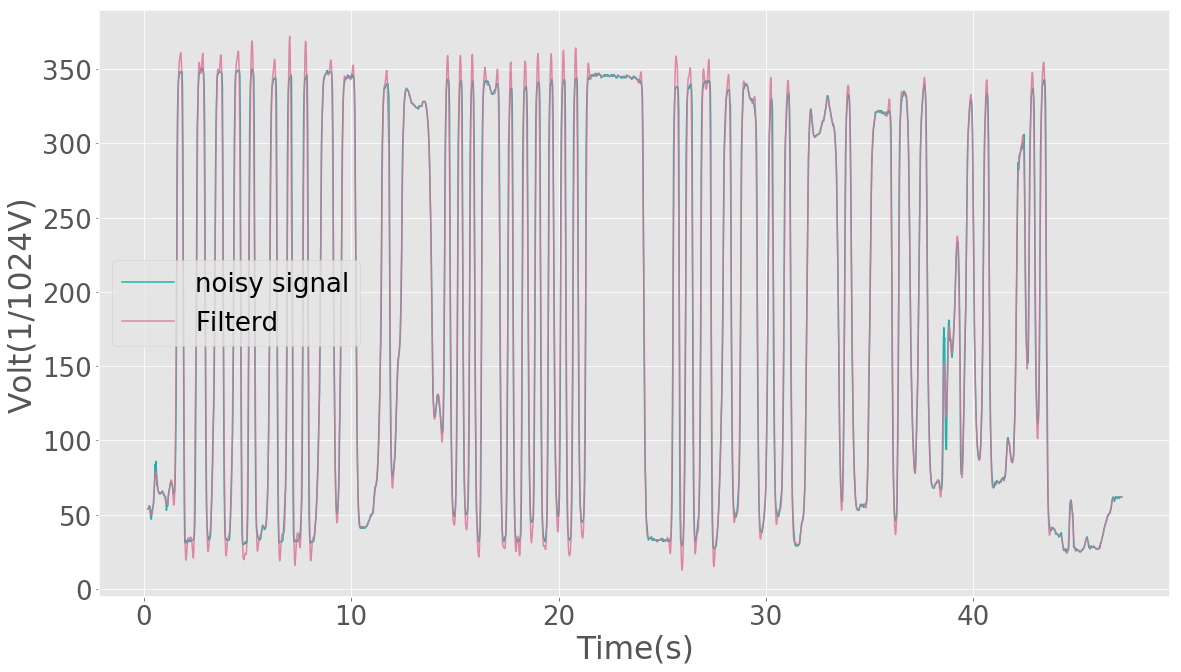

,Time,Volt,Filterd
0,0.194,54,53.992646
1,0.214,54,54.553380
2,0.236,54,54.875910
3,0.258,56,54.734776
4,0.280,56,54.027502


In [145]:
df.Time = df.Time / 1000
df["Filterd"] = lowpass_filt(df.Time,df["Volt"])
df.head()

In [146]:
df.Time = df.Time * 1000000000

df.index = pd.DatetimeIndex(df.Time,dtype='datetime64[ms]', freq=None)

len(df)
df.head()

,Time,Volt,Filterd
Time,,,
1970-01-01 00:00:00.194,194000000.0,54,53.992646
1970-01-01 00:00:00.214,214000000.0,54,54.553380
1970-01-01 00:00:00.236,236000000.0,54,54.875910
1970-01-01 00:00:00.258,258000000.0,56,54.734776
1970-01-01 00:00:00.280,280000000.0,56,54.027502


In [147]:
df = df.resample('10L').interpolate()

#df = df.drop("Time",axis=1)
#df.index = df.index.time
df.head()

,Time,Volt,Filterd
Time,,,
1970-01-01 00:00:00.190,NaN,NaN,NaN
1970-01-01 00:00:00.200,NaN,NaN,NaN
1970-01-01 00:00:00.210,NaN,NaN,NaN
1970-01-01 00:00:00.220,NaN,NaN,NaN
1970-01-01 00:00:00.230,NaN,NaN,NaN


In [148]:
X = pd.DataFrame([330,60])

min = 0
max = 5
y = pd.DataFrame([min,max])


In [149]:
from sklearn.preprocessing import PolynomialFeatures
regr = LinearRegression()
regr.fit(X, y)
y_fit = regr.predict(X)


In [150]:
dist_func = lambda x: x * regr.coef_ + regr.intercept_
df["Dist"] = df["Volt"].map(dist_func)
df["Dist"] = df["Dist"].values
df["Dist"] = df["Dist"].map(lambda x : min if x < min else (max if x > max else x))
df["Theta"] = df["Dist"].map(lambda x : math.degrees(math.acos(x/5.5)))
df["Angle"] = df["Theta"].map(lambda x : x*x/90)
df["Diff"] = df["Angle"].diff()

df["Fabs"] = np.fabs(df["Diff"])
df["Sum"] = df["Fabs"].cumsum()

df.Time = df.Time /1000000000


In [151]:
df2 = df.resample('60S').sum()
df2.tail()
df = df[df.Time > 0]

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


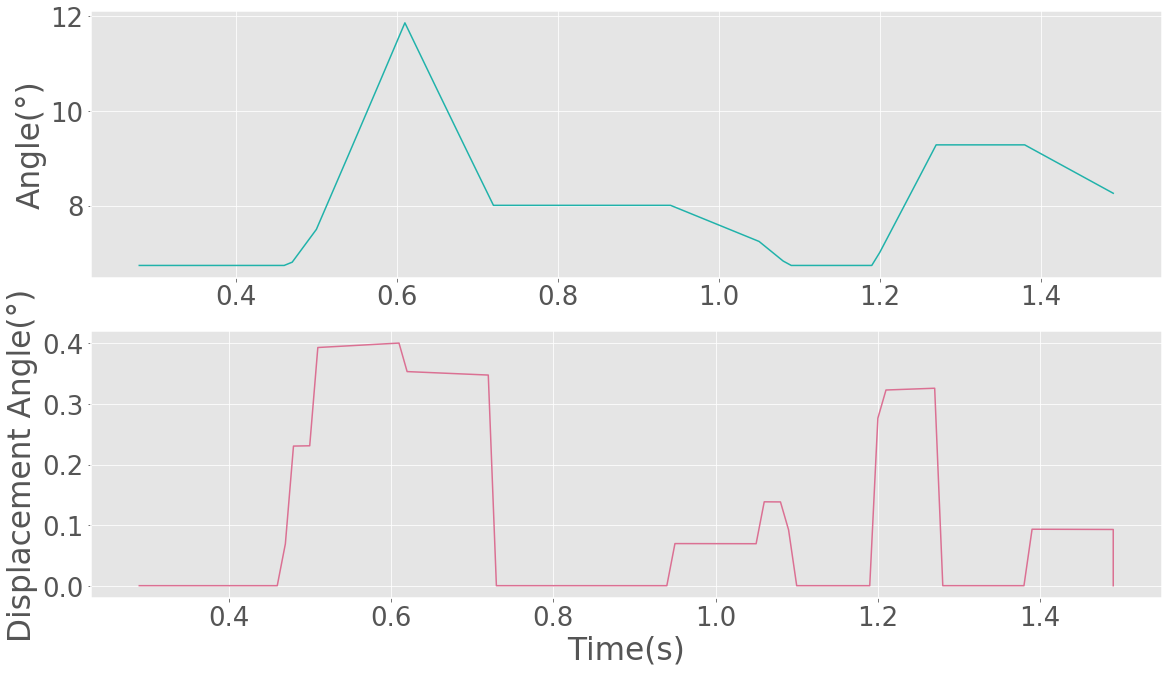

In [152]:
plt.subplot(2,1,1)
plt.plot(df.Time,df.Angle,'lightseagreen')
plt.ylabel("Angle(°)")

plt.subplot(2,1,2)
plt.plot(df.Time,df.Fabs,'palevioletred')
plt.ylabel("Displacement Angle(°)")
plt.xlabel("Time(s)")


/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


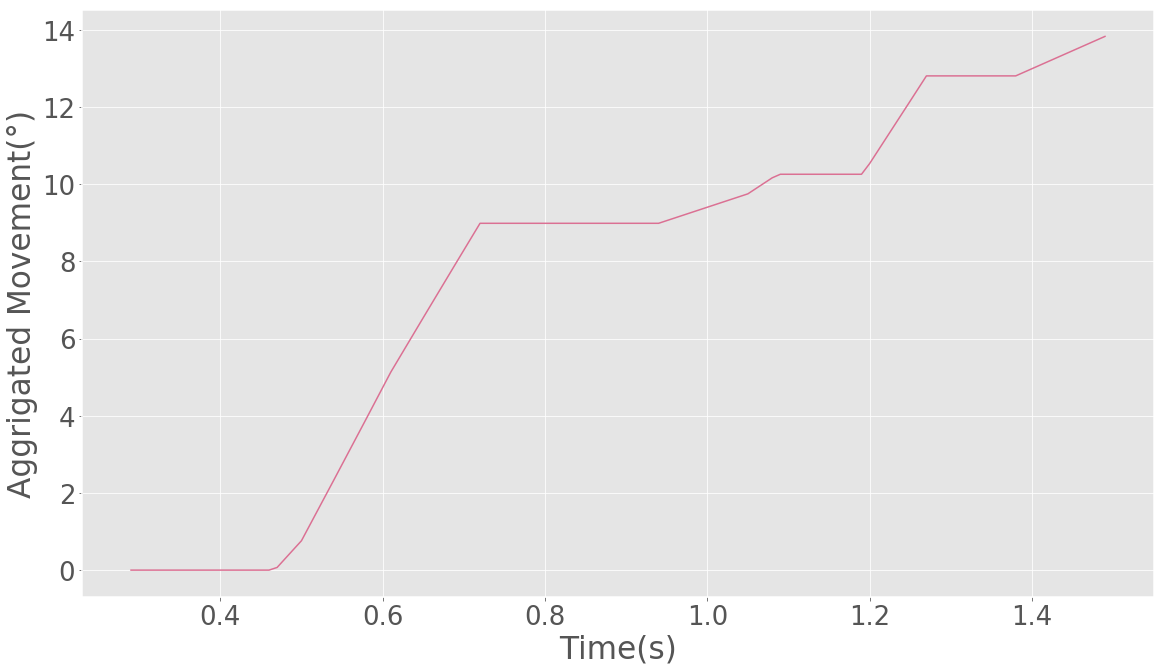

In [153]:
plt.plot(df.Time,df.Sum,'palevioletred')
plt.ylabel("Aggrigated Movement(°)")
plt.xlabel("Time(s)")



In [154]:
df2.index = df2.index.time

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


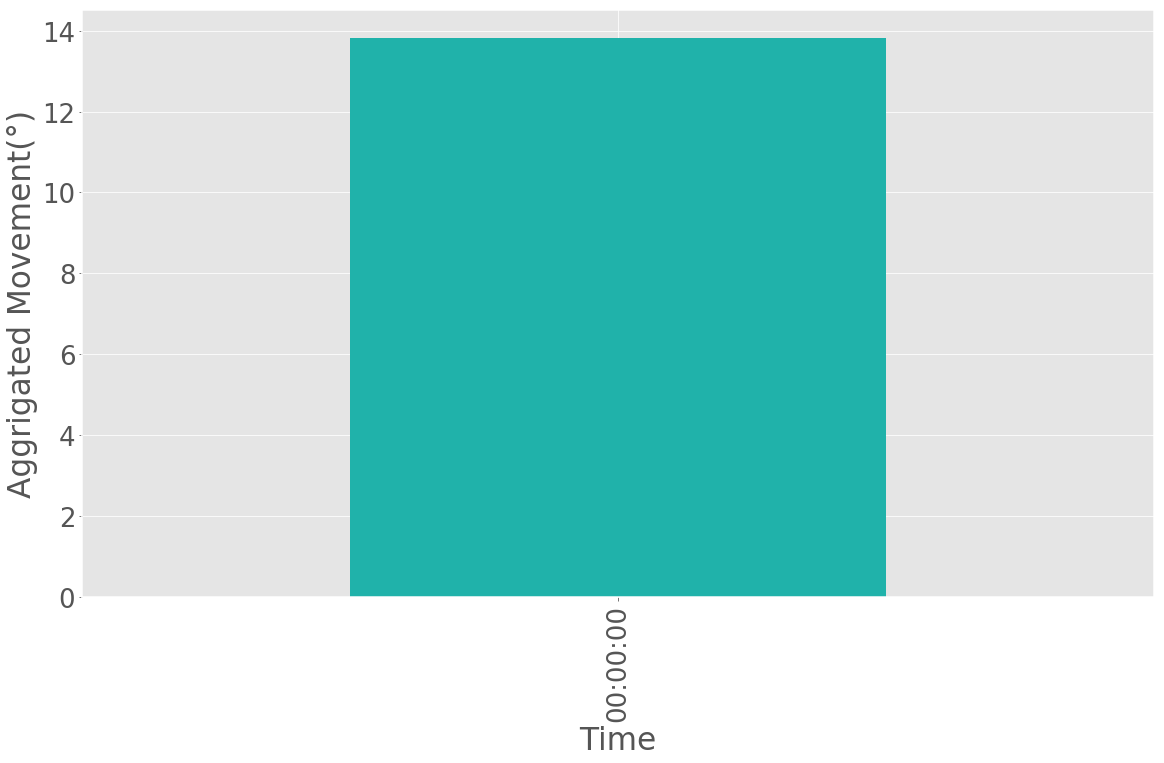

In [155]:
df2.Fabs.plot.bar(color='lightseagreen')

plt.ylabel("Aggrigated Movement(°)")
plt.xlabel("Time")


In [156]:
df.tail()

,Time,Volt,Filterd,Dist,Theta,Angle,Diff,Fabs,Sum
Time,,,,,,,,,
1970-01-01 00:00:47.110,1.49,66.0,64.631793,[[4.888888888888889]],27.266044,8.260413,0.0,0.0,13.82668
1970-01-01 00:00:47.120,1.49,66.0,64.631793,[[4.888888888888889]],27.266044,8.260413,0.0,0.0,13.82668
1970-01-01 00:00:47.130,1.49,66.0,64.631793,[[4.888888888888889]],27.266044,8.260413,0.0,0.0,13.82668
1970-01-01 00:00:47.140,1.49,66.0,64.631793,[[4.888888888888889]],27.266044,8.260413,0.0,0.0,13.82668
1970-01-01 00:00:47.150,1.49,66.0,64.631793,[[4.888888888888889]],27.266044,8.260413,0.0,0.0,13.82668


In [157]:
df.describe()

,Time,Volt,Filterd,Theta,Angle,Diff,Fabs,Sum
count,4688.000000,4688.000000,4688.000000,4688.000000,4688.000000,4687.000000,4687.000000,4687.000000
mean,1.474256,65.961391,64.619649,27.257890,8.256678,0.000325,0.002950,13.670469
std,0.111838,1.008605,1.023667,0.329311,0.201439,0.030213,0.030071,1.203250
min,0.280000,53.000000,49.961196,24.619977,6.734925,-0.353522,0.000000,0.000000
25%,1.490000,66.000000,64.631793,27.266044,8.260413,0.000000,0.000000,13.826680
50%,1.490000,66.000000,64.631793,27.266044,8.260413,0.000000,0.000000,13.826680
75%,1.490000,66.000000,64.631793,27.266044,8.260413,0.000000,0.000000,13.826680
max,1.490000,80.000000,77.774988,32.674531,11.862500,0.400615,0.400615,13.826680
